In [109]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize as opt


A=0
$$ \frac{I_t}{I_i}=\frac{1}{1+\frac{4R}{(1-R)^2}sin^2(\frac{4\pi d}{2 \lambda}) $$

In [110]:
def model(d,R,s):
    lam=632e-9
    F= 4*R/((1-R)**2)
    x= (2*s*np.pi*d)/(2.929825153328242)
    return (1/(1+F*np.sin(x)**2))


In [111]:
s2f1=np.loadtxt(open("FP_set3_trail1.csv", "rb"), delimiter=",")
s2f1[1]= savgol_filter(s2f1[1], 25, 3) * 1000
#s3f1[1]=s3f1[1]*1000

sigma_y = s2f1[1] * 0.01
splines2f1= inter.InterpolatedUnivariateSpline(s2f1[0], s2f1[1])

s2f2=np.loadtxt(open("FP_set3_trail1.csv", "rb"), delimiter=",", )
s2f2[1]= savgol_filter(s2f2[1], 25, 3) * 1000
splines2f2= inter.InterpolatedUnivariateSpline(s2f2[0], s2f2[1])
#s3f2[1]=s3f2[1]*1000



s2f3=np.loadtxt(open("FP_set3_trail3.csv", "rb"), delimiter=",")
s2f3[1]= savgol_filter(s2f3[1], 25, 3) * 1000
splines2f3= inter.InterpolatedUnivariateSpline(s2f3[0], s2f3[1])
#s3f3[1]=s3f3[1]*1000




In [112]:
fits3f1

(array([1.03097637, 2.49909968]),
 array([[1.73411654e-09, 2.04024555e-12],
        [2.04024555e-12, 1.71875664e-12]]))

Text(0.5, 1.0, 'Mirror Set 3 Trail 1: Lock In vs Piezo Voltage ')

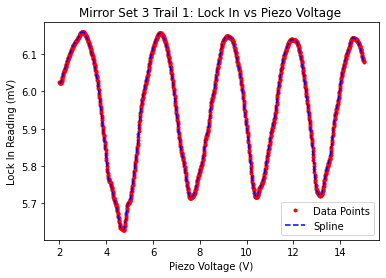

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f1[0], s2f1[1], 'r.', label="Data Points")

ax.plot(s2f1[0], splines2f1(s2f1[0]), 'b--', label="Spline")

ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Mirror Set 3 Trail 1: Lock In vs Piezo Voltage ")


Text(0.5, 1.0, 'Mirror Set 3 Trail 2: Lock In vs Piezo Voltage')

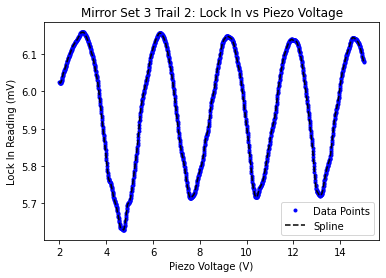

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f2[0], s2f2[1], 'b.', label="Data Points")
ax.plot(s2f2[0], splines2f2(s2f2[0]), 'k--', label="Spline")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Mirror Set 3 Trail 2: Lock In vs Piezo Voltage")


Text(0.5, 1.0, 'Mirror Set 3 Trail 3: Lock In vs Piezo Voltage')

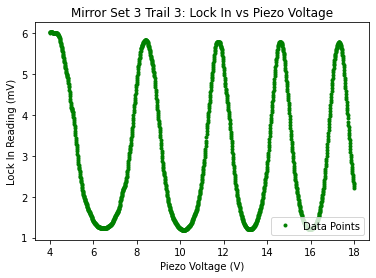

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f3[0], s2f3[1], 'g.', label="Data Points")
#ax.plot(s3f3[0],model(s3f3[0], fits3f3[0][0]),'k--', label="Model")


ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Mirror Set 3 Trail 3: Lock In vs Piezo Voltage")

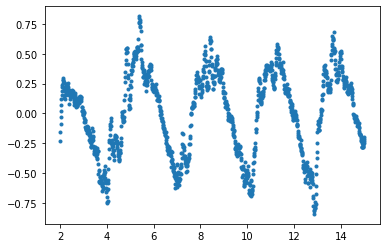

In [116]:
# Calculate x for max
firstdevs1f1=splines2f1.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(s1f1[0],10*splines1f1(s1f1[0]),'k--', label="Spline")
ax.plot(s2f1[0],firstdevs1f1(s2f1[0]), '.', label="Data Points")

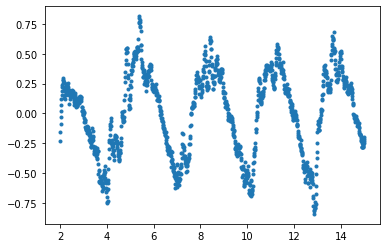

In [117]:
# Calculate x for max
firstdevs1f2=splines2f2.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(s1f2[0],10*splines1f2(s1f2[0]),'k--', label="Spline")
ax.plot(s2f2[0],firstdevs1f2(s2f2[0]), '.', label="Data Points")

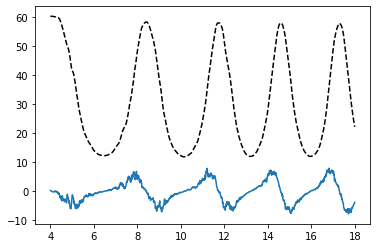

In [118]:
# Calculate x for max
firstdevs1f3=splines2f3.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s2f3[0],10*splines2f3(s2f3[0]),'k--', label="Spline")
ax.plot(s2f3[0],firstdevs1f3(s2f3[0]), '', label="Data Points")

In [119]:
firstpeakt1=opt.brentq(firstdevs1f1, 8, 9)
secondpeakt1=opt.brentq(firstdevs1f1,11, 12)
thirdpeakt1= opt.brentq(firstdevs1f1, 14 , 15)
fourthpeakt1= opt.brentq(firstdevs1f1, 17, 18)

print(f"Peaks for the first trail are: {firstpeakt1};{secondpeakt1};{thirdpeakt1};{fourthpeakt1}")

ValueError: f(a) and f(b) must have different signs

In [ ]:
secondpeakt1-firstpeakt1, thirdpeakt1-secondpeakt1,fourthpeakt1-thirdpeakt1

In [ ]:

firstpeakt2=opt.brentq(firstdevs1f2, 9, 10)
secondpeakt2=opt.brentq(firstdevs1f2,12, 14)
thirdpeakt2= opt.brentq(firstdevs1f2, 15 , 16)


print(f"Peaks for the second trail are: {firstpeakt2};{secondpeakt2};{thirdpeakt2};")


firstpeakt3=opt.brentq(firstdevs1f3, 7, 8)
secondpeakt3=opt.brentq(firstdevs1f3,10, 11)
thirdpeakt3= opt.brentq(firstdevs1f3, 13 , 14)
fourthpeakt3= opt.brentq(firstdevs1f3, 16, 17)
print(f"Peaks for the second trail are: {firstpeakt3};{secondpeakt3};{thirdpeakt3};{fourthpeakt3}")

In [ ]:
np.mean([secondpeakt1-firstpeakt1, thirdpeakt1-secondpeakt1,fourthpeakt1-thirdpeakt1,secondpeakt2-firstpeakt2,thirdpeakt2-secondpeakt2,secondpeakt3-firstpeakt3,thirdpeakt3-secondpeakt3,fourthpeakt3-thirdpeakt3])

In [ ]:
firstwhmt1= opt.brentq(lambda x: splines2f1(x) - splines2f1(firstpeakt1) / 2, 8.4, 9.4) - opt.brentq(lambda x: splines2f1(x) - splines2f1(firstpeakt1) / 2, 7, 7.9)
secondwhmt1= opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 12, 13) - opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 10.3, 11.6)
thirdwhmt1= opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 17, 18) - opt.brentq(lambda x: splines2f1(x) - splines2f1(secondpeakt1) / 2, 16, 17)

firstwhmt2= opt.brentq(lambda x: splines2f2(x) - splines2f2(firstpeakt2) / 2, 10, 10.8) - opt.brentq(lambda x: splines2f2(x) - splines2f2(firstpeakt2) / 2, 9, 10)
secondwhmt2= opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 13, 14) - opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 12, 13)
thirdwhmt2= opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 16, 17) - opt.brentq(lambda x: splines2f2(x) - splines2f2(secondpeakt2) / 2, 15, 16)

firstwhmt3= opt.brentq(lambda x: splines2f3(x) - splines2f3(firstpeakt3) / 2, 7.7, 9.4) - opt.brentq(lambda x: splines2f3(x) - splines2f3(firstpeakt3) / 2, 6, 7.7)
secondwhmt3= opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 10.7, 12) - opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 10, 10.7)
thirdwhmt3= opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 13.5, 14.5) - opt.brentq(lambda x: splines2f3(x) - splines2f3(secondpeakt3) / 2, 12, 13.4)

In [ ]:
print(firstwhmt1, secondwhmt1, thirdwhmt1)
print(firstwhmt2, secondwhmt2, thirdwhmt2)
print(firstwhmt3, secondwhmt3, thirdwhmt3)

In [ ]:
finess=np.array([(secondpeakt1 - firstpeakt1) / firstwhmt1, (thirdpeakt1 - secondpeakt1) / secondwhmt1, (fourthpeakt1 - thirdpeakt1) / thirdwhmt1,(secondpeakt2 - firstpeakt2) / firstwhmt2, (thirdpeakt2 - secondpeakt2) / secondwhmt2,
                 (secondpeakt3 - firstpeakt3) / firstwhmt3, (thirdpeakt3 - secondpeakt3) / secondwhmt3,(fourthpeakt3 - thirdpeakt3) / thirdwhmt3
])
finess, np.mean(finess), np.std(finess)

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [ ]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [ ]:
R=r(finess)

In [ ]:
np.mean(R),np.std(R)

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


In [ ]:
R

$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [ ]:
np.mean(R)

In [ ]:
np.std(R)